# 결과 데이터를 예측하는 회귀 ANN 구현

보스턴 집값을 예측

In [8]:
# 회귀 ANN 모델 구현을 위한 패키지 불러오기 
from keras import models, layers

# 학습과 평가용 데이터 및 데이터 전치리를 위한 라이브러리 불러오기
from keras import datasets
from sklearn import preprocessing

# 회귀 ANN 학습 결과 그래프 구현
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss

In [15]:
# ANN 객체 class 생성하기 

class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        
        super().__init__(x,y) # 클래스 초기화
        self.compile(loss='mse', optimizer='sgd')
                

In [13]:
# 보스턴 집값과 관련한 데이터 가져오기 (총 506건의 보스턴 집값과 13가지 정보가 담김)

# 데이터 전처리
# MinMaxScalar() -> 최대값과 최소값을 1과 0으로 정규화 해주는 함수
def data_func():
    (x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()
    scalar = preprocessing.MinMaxScaler()
    x_train = scalar.fit_transform(x_train)
    x_test = scalar.transform(x_test)
    
    return (x_train, y_train), (x_test, y_test)

Train on 323 samples, validate on 81 samples
Epoch 1/200
323/323 [==============================] - 0s 423us/step - loss: 552.2154 - val_loss: 505.7201
Epoch 2/200
323/323 [==============================] - 0s 25us/step - loss: 298.6330 - val_loss: 118.5571
Epoch 3/200
323/323 [==============================] - 0s 19us/step - loss: 94.7876 - val_loss: 115.3011
Epoch 4/200
323/323 [==============================] - 0s 19us/step - loss: 79.8859 - val_loss: 127.6999
Epoch 5/200
323/323 [==============================] - 0s 19us/step - loss: 68.1647 - val_loss: 66.2618
Epoch 6/200
323/323 [==============================] - 0s 15us/step - loss: 54.4743 - val_loss: 101.1549
Epoch 7/200
323/323 [==============================] - 0s 22us/step - loss: 57.5922 - val_loss: 52.2890
Epoch 8/200
323/323 [==============================] - 0s 15us/step - loss: 49.2948 - val_loss: 60.5620
Epoch 9/200
323/323 [==============================] - 0s 19us/step - loss: 50.1225 - val_loss: 66.9182
Epoch 10/20

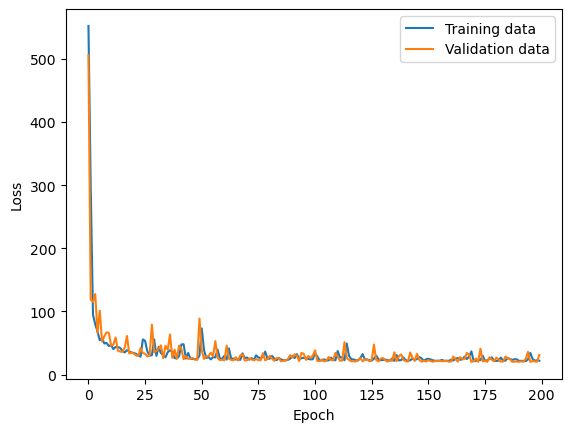

In [22]:
def main():
    Nin = 13 # 13가지 정보를 받아들임 (1개의 집값에는 13가지 정보가 있으니깐 입력층의 노드 개수는 13개)
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (x_train, y_train), (x_test, y_test) = data_func()
    
    # 함수 인자로 verbose가 있으면 함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 나타낸다. 
    # 보통 0 은 출력하지 않고, 1은 자세히, 2는 함축적인 정보만 출력하는 형태로 되어 있습니다.
    history = model.fit(x_train, y_train, epochs = 200, batch_size = 100, validation_split = 0.2, verbose = 1)
    
    performance_test = model.evaluate(x_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))
    
    plot_loss(history)
    plt.show()

if __name__ == '__main__':
    main()
